# Detached
## One hiden layer

In [1]:
import numpy as np
import random
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

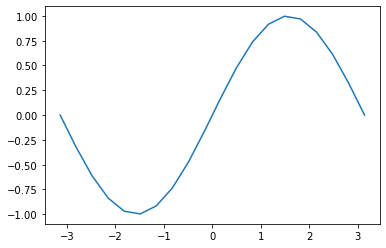

In [2]:
Nmin=-np.pi
Nmax=np.pi
N=20

class MyDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        sample = {'data': float(self.data[idx]), 'label': self.label[idx]}
        return sample

    
def fun(x):
    return np.sin(x)


data=np.linspace(Nmin, Nmax, num=N)
label=fun(data)

train_data=data
train_label=label
plt.plot(train_data,train_label)




In [3]:
train_loader = torch.utils.data.DataLoader(dataset=MyDataset(train_data,train_label), 
                                           batch_size=N, 
                                           shuffle=False)

In [49]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 1
hidden_size1 = 1000
num_classes = 1
num_epochs = 10000
batch_size = N
learning_rate = 0.001




class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, num_classes,bias=False)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        #out = out/np.sqrt(hidden_size1)
        out = out/hidden_size1
        return out
model = NeuralNet(input_size, hidden_size1, num_classes).to(device)

criterion=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [50]:
delta=300
with torch.no_grad():
    for i in range(hidden_size1):
        if delta>0:
            model.fc2.weight[0,i]=np.random.normal(0, 0.01)
            model.fc1.weight[i,0]=np.random.normal(0, delta)
            model.fc1.bias[i]=np.random.normal(0, delta)

        if delta<0:
            model.fc2.weight[0,i]=np.random.normal(0, -delta)
            #model.fc2.weight[0,i]=delta*np.sign(np.random.normal(0, -delta))
            model.fc1.weight[i,0]=np.random.normal(0, 0.01)
            model.fc1.bias[i]=np.random.normal(0, 0.01)


In [51]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):  
        # Move tensors to the configured device
        images = data['data'].reshape(-1, 1).to(device).float()
        labels = data['label'].reshape(-1, 1).to(device).float()


        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))



Epoch [1/10000], Step [1/1], Loss: 0.4465
Epoch [2/10000], Step [1/1], Loss: 0.3716
Epoch [3/10000], Step [1/1], Loss: 0.3226
Epoch [4/10000], Step [1/1], Loss: 0.2906
Epoch [5/10000], Step [1/1], Loss: 0.2695
Epoch [6/10000], Step [1/1], Loss: 0.2556
Epoch [7/10000], Step [1/1], Loss: 0.2462
Epoch [8/10000], Step [1/1], Loss: 0.2399
Epoch [9/10000], Step [1/1], Loss: 0.2355
Epoch [10/10000], Step [1/1], Loss: 0.2324
Epoch [11/10000], Step [1/1], Loss: 0.2302
Epoch [12/10000], Step [1/1], Loss: 0.2285
Epoch [13/10000], Step [1/1], Loss: 0.2272
Epoch [14/10000], Step [1/1], Loss: 0.2261
Epoch [15/10000], Step [1/1], Loss: 0.2252
Epoch [16/10000], Step [1/1], Loss: 0.2243
Epoch [17/10000], Step [1/1], Loss: 0.2236
Epoch [18/10000], Step [1/1], Loss: 0.2229
Epoch [19/10000], Step [1/1], Loss: 0.2222
Epoch [20/10000], Step [1/1], Loss: 0.2215
Epoch [21/10000], Step [1/1], Loss: 0.2209
Epoch [22/10000], Step [1/1], Loss: 0.2202
Epoch [23/10000], Step [1/1], Loss: 0.2196
Epoch [24/10000], St

Epoch [364/10000], Step [1/1], Loss: 0.0910
Epoch [365/10000], Step [1/1], Loss: 0.0908
Epoch [366/10000], Step [1/1], Loss: 0.0906
Epoch [367/10000], Step [1/1], Loss: 0.0903
Epoch [368/10000], Step [1/1], Loss: 0.0901
Epoch [369/10000], Step [1/1], Loss: 0.0899
Epoch [370/10000], Step [1/1], Loss: 0.0897
Epoch [371/10000], Step [1/1], Loss: 0.0895
Epoch [372/10000], Step [1/1], Loss: 0.0893
Epoch [373/10000], Step [1/1], Loss: 0.0891
Epoch [374/10000], Step [1/1], Loss: 0.0889
Epoch [375/10000], Step [1/1], Loss: 0.0887
Epoch [376/10000], Step [1/1], Loss: 0.0885
Epoch [377/10000], Step [1/1], Loss: 0.0883
Epoch [378/10000], Step [1/1], Loss: 0.0881
Epoch [379/10000], Step [1/1], Loss: 0.0879
Epoch [380/10000], Step [1/1], Loss: 0.0877
Epoch [381/10000], Step [1/1], Loss: 0.0875
Epoch [382/10000], Step [1/1], Loss: 0.0873
Epoch [383/10000], Step [1/1], Loss: 0.0871
Epoch [384/10000], Step [1/1], Loss: 0.0869
Epoch [385/10000], Step [1/1], Loss: 0.0867
Epoch [386/10000], Step [1/1], L

Epoch [742/10000], Step [1/1], Loss: 0.0430
Epoch [743/10000], Step [1/1], Loss: 0.0430
Epoch [744/10000], Step [1/1], Loss: 0.0429
Epoch [745/10000], Step [1/1], Loss: 0.0428
Epoch [746/10000], Step [1/1], Loss: 0.0428
Epoch [747/10000], Step [1/1], Loss: 0.0427
Epoch [748/10000], Step [1/1], Loss: 0.0426
Epoch [749/10000], Step [1/1], Loss: 0.0426
Epoch [750/10000], Step [1/1], Loss: 0.0425
Epoch [751/10000], Step [1/1], Loss: 0.0424
Epoch [752/10000], Step [1/1], Loss: 0.0424
Epoch [753/10000], Step [1/1], Loss: 0.0423
Epoch [754/10000], Step [1/1], Loss: 0.0422
Epoch [755/10000], Step [1/1], Loss: 0.0422
Epoch [756/10000], Step [1/1], Loss: 0.0421
Epoch [757/10000], Step [1/1], Loss: 0.0420
Epoch [758/10000], Step [1/1], Loss: 0.0420
Epoch [759/10000], Step [1/1], Loss: 0.0419
Epoch [760/10000], Step [1/1], Loss: 0.0418
Epoch [761/10000], Step [1/1], Loss: 0.0418
Epoch [762/10000], Step [1/1], Loss: 0.0417
Epoch [763/10000], Step [1/1], Loss: 0.0417
Epoch [764/10000], Step [1/1], L

Epoch [1133/10000], Step [1/1], Loss: 0.0269
Epoch [1134/10000], Step [1/1], Loss: 0.0269
Epoch [1135/10000], Step [1/1], Loss: 0.0269
Epoch [1136/10000], Step [1/1], Loss: 0.0269
Epoch [1137/10000], Step [1/1], Loss: 0.0268
Epoch [1138/10000], Step [1/1], Loss: 0.0268
Epoch [1139/10000], Step [1/1], Loss: 0.0268
Epoch [1140/10000], Step [1/1], Loss: 0.0268
Epoch [1141/10000], Step [1/1], Loss: 0.0268
Epoch [1142/10000], Step [1/1], Loss: 0.0267
Epoch [1143/10000], Step [1/1], Loss: 0.0267
Epoch [1144/10000], Step [1/1], Loss: 0.0267
Epoch [1145/10000], Step [1/1], Loss: 0.0267
Epoch [1146/10000], Step [1/1], Loss: 0.0266
Epoch [1147/10000], Step [1/1], Loss: 0.0266
Epoch [1148/10000], Step [1/1], Loss: 0.0266
Epoch [1149/10000], Step [1/1], Loss: 0.0266
Epoch [1150/10000], Step [1/1], Loss: 0.0266
Epoch [1151/10000], Step [1/1], Loss: 0.0265
Epoch [1152/10000], Step [1/1], Loss: 0.0265
Epoch [1153/10000], Step [1/1], Loss: 0.0265
Epoch [1154/10000], Step [1/1], Loss: 0.0265
Epoch [115

Epoch [1517/10000], Step [1/1], Loss: 0.0213
Epoch [1518/10000], Step [1/1], Loss: 0.0212
Epoch [1519/10000], Step [1/1], Loss: 0.0212
Epoch [1520/10000], Step [1/1], Loss: 0.0212
Epoch [1521/10000], Step [1/1], Loss: 0.0212
Epoch [1522/10000], Step [1/1], Loss: 0.0212
Epoch [1523/10000], Step [1/1], Loss: 0.0212
Epoch [1524/10000], Step [1/1], Loss: 0.0212
Epoch [1525/10000], Step [1/1], Loss: 0.0212
Epoch [1526/10000], Step [1/1], Loss: 0.0212
Epoch [1527/10000], Step [1/1], Loss: 0.0212
Epoch [1528/10000], Step [1/1], Loss: 0.0212
Epoch [1529/10000], Step [1/1], Loss: 0.0211
Epoch [1530/10000], Step [1/1], Loss: 0.0211
Epoch [1531/10000], Step [1/1], Loss: 0.0211
Epoch [1532/10000], Step [1/1], Loss: 0.0211
Epoch [1533/10000], Step [1/1], Loss: 0.0211
Epoch [1534/10000], Step [1/1], Loss: 0.0211
Epoch [1535/10000], Step [1/1], Loss: 0.0211
Epoch [1536/10000], Step [1/1], Loss: 0.0211
Epoch [1537/10000], Step [1/1], Loss: 0.0211
Epoch [1538/10000], Step [1/1], Loss: 0.0211
Epoch [153

Epoch [1910/10000], Step [1/1], Loss: 0.0186
Epoch [1911/10000], Step [1/1], Loss: 0.0186
Epoch [1912/10000], Step [1/1], Loss: 0.0186
Epoch [1913/10000], Step [1/1], Loss: 0.0186
Epoch [1914/10000], Step [1/1], Loss: 0.0186
Epoch [1915/10000], Step [1/1], Loss: 0.0186
Epoch [1916/10000], Step [1/1], Loss: 0.0186
Epoch [1917/10000], Step [1/1], Loss: 0.0186
Epoch [1918/10000], Step [1/1], Loss: 0.0186
Epoch [1919/10000], Step [1/1], Loss: 0.0186
Epoch [1920/10000], Step [1/1], Loss: 0.0186
Epoch [1921/10000], Step [1/1], Loss: 0.0186
Epoch [1922/10000], Step [1/1], Loss: 0.0186
Epoch [1923/10000], Step [1/1], Loss: 0.0186
Epoch [1924/10000], Step [1/1], Loss: 0.0186
Epoch [1925/10000], Step [1/1], Loss: 0.0185
Epoch [1926/10000], Step [1/1], Loss: 0.0185
Epoch [1927/10000], Step [1/1], Loss: 0.0185
Epoch [1928/10000], Step [1/1], Loss: 0.0185
Epoch [1929/10000], Step [1/1], Loss: 0.0185
Epoch [1930/10000], Step [1/1], Loss: 0.0185
Epoch [1931/10000], Step [1/1], Loss: 0.0185
Epoch [193

Epoch [2259/10000], Step [1/1], Loss: 0.0172
Epoch [2260/10000], Step [1/1], Loss: 0.0172
Epoch [2261/10000], Step [1/1], Loss: 0.0172
Epoch [2262/10000], Step [1/1], Loss: 0.0172
Epoch [2263/10000], Step [1/1], Loss: 0.0172
Epoch [2264/10000], Step [1/1], Loss: 0.0171
Epoch [2265/10000], Step [1/1], Loss: 0.0171
Epoch [2266/10000], Step [1/1], Loss: 0.0171
Epoch [2267/10000], Step [1/1], Loss: 0.0171
Epoch [2268/10000], Step [1/1], Loss: 0.0171
Epoch [2269/10000], Step [1/1], Loss: 0.0171
Epoch [2270/10000], Step [1/1], Loss: 0.0171
Epoch [2271/10000], Step [1/1], Loss: 0.0171
Epoch [2272/10000], Step [1/1], Loss: 0.0171
Epoch [2273/10000], Step [1/1], Loss: 0.0171
Epoch [2274/10000], Step [1/1], Loss: 0.0171
Epoch [2275/10000], Step [1/1], Loss: 0.0171
Epoch [2276/10000], Step [1/1], Loss: 0.0171
Epoch [2277/10000], Step [1/1], Loss: 0.0171
Epoch [2278/10000], Step [1/1], Loss: 0.0171
Epoch [2279/10000], Step [1/1], Loss: 0.0171
Epoch [2280/10000], Step [1/1], Loss: 0.0171
Epoch [228

Epoch [2623/10000], Step [1/1], Loss: 0.0160
Epoch [2624/10000], Step [1/1], Loss: 0.0160
Epoch [2625/10000], Step [1/1], Loss: 0.0160
Epoch [2626/10000], Step [1/1], Loss: 0.0160
Epoch [2627/10000], Step [1/1], Loss: 0.0160
Epoch [2628/10000], Step [1/1], Loss: 0.0160
Epoch [2629/10000], Step [1/1], Loss: 0.0160
Epoch [2630/10000], Step [1/1], Loss: 0.0160
Epoch [2631/10000], Step [1/1], Loss: 0.0160
Epoch [2632/10000], Step [1/1], Loss: 0.0160
Epoch [2633/10000], Step [1/1], Loss: 0.0160
Epoch [2634/10000], Step [1/1], Loss: 0.0160
Epoch [2635/10000], Step [1/1], Loss: 0.0160
Epoch [2636/10000], Step [1/1], Loss: 0.0159
Epoch [2637/10000], Step [1/1], Loss: 0.0159
Epoch [2638/10000], Step [1/1], Loss: 0.0159
Epoch [2639/10000], Step [1/1], Loss: 0.0159
Epoch [2640/10000], Step [1/1], Loss: 0.0159
Epoch [2641/10000], Step [1/1], Loss: 0.0159
Epoch [2642/10000], Step [1/1], Loss: 0.0159
Epoch [2643/10000], Step [1/1], Loss: 0.0159
Epoch [2644/10000], Step [1/1], Loss: 0.0159
Epoch [264

Epoch [2961/10000], Step [1/1], Loss: 0.0150
Epoch [2962/10000], Step [1/1], Loss: 0.0150
Epoch [2963/10000], Step [1/1], Loss: 0.0150
Epoch [2964/10000], Step [1/1], Loss: 0.0150
Epoch [2965/10000], Step [1/1], Loss: 0.0150
Epoch [2966/10000], Step [1/1], Loss: 0.0150
Epoch [2967/10000], Step [1/1], Loss: 0.0150
Epoch [2968/10000], Step [1/1], Loss: 0.0150
Epoch [2969/10000], Step [1/1], Loss: 0.0150
Epoch [2970/10000], Step [1/1], Loss: 0.0150
Epoch [2971/10000], Step [1/1], Loss: 0.0150
Epoch [2972/10000], Step [1/1], Loss: 0.0150
Epoch [2973/10000], Step [1/1], Loss: 0.0150
Epoch [2974/10000], Step [1/1], Loss: 0.0150
Epoch [2975/10000], Step [1/1], Loss: 0.0150
Epoch [2976/10000], Step [1/1], Loss: 0.0150
Epoch [2977/10000], Step [1/1], Loss: 0.0150
Epoch [2978/10000], Step [1/1], Loss: 0.0150
Epoch [2979/10000], Step [1/1], Loss: 0.0150
Epoch [2980/10000], Step [1/1], Loss: 0.0150
Epoch [2981/10000], Step [1/1], Loss: 0.0150
Epoch [2982/10000], Step [1/1], Loss: 0.0150
Epoch [298

Epoch [3310/10000], Step [1/1], Loss: 0.0141
Epoch [3311/10000], Step [1/1], Loss: 0.0141
Epoch [3312/10000], Step [1/1], Loss: 0.0141
Epoch [3313/10000], Step [1/1], Loss: 0.0141
Epoch [3314/10000], Step [1/1], Loss: 0.0141
Epoch [3315/10000], Step [1/1], Loss: 0.0141
Epoch [3316/10000], Step [1/1], Loss: 0.0141
Epoch [3317/10000], Step [1/1], Loss: 0.0141
Epoch [3318/10000], Step [1/1], Loss: 0.0141
Epoch [3319/10000], Step [1/1], Loss: 0.0141
Epoch [3320/10000], Step [1/1], Loss: 0.0141
Epoch [3321/10000], Step [1/1], Loss: 0.0141
Epoch [3322/10000], Step [1/1], Loss: 0.0141
Epoch [3323/10000], Step [1/1], Loss: 0.0141
Epoch [3324/10000], Step [1/1], Loss: 0.0141
Epoch [3325/10000], Step [1/1], Loss: 0.0141
Epoch [3326/10000], Step [1/1], Loss: 0.0141
Epoch [3327/10000], Step [1/1], Loss: 0.0141
Epoch [3328/10000], Step [1/1], Loss: 0.0141
Epoch [3329/10000], Step [1/1], Loss: 0.0141
Epoch [3330/10000], Step [1/1], Loss: 0.0141
Epoch [3331/10000], Step [1/1], Loss: 0.0141
Epoch [333

Epoch [3672/10000], Step [1/1], Loss: 0.0133
Epoch [3673/10000], Step [1/1], Loss: 0.0133
Epoch [3674/10000], Step [1/1], Loss: 0.0133
Epoch [3675/10000], Step [1/1], Loss: 0.0133
Epoch [3676/10000], Step [1/1], Loss: 0.0133
Epoch [3677/10000], Step [1/1], Loss: 0.0133
Epoch [3678/10000], Step [1/1], Loss: 0.0133
Epoch [3679/10000], Step [1/1], Loss: 0.0133
Epoch [3680/10000], Step [1/1], Loss: 0.0133
Epoch [3681/10000], Step [1/1], Loss: 0.0133
Epoch [3682/10000], Step [1/1], Loss: 0.0133
Epoch [3683/10000], Step [1/1], Loss: 0.0133
Epoch [3684/10000], Step [1/1], Loss: 0.0133
Epoch [3685/10000], Step [1/1], Loss: 0.0133
Epoch [3686/10000], Step [1/1], Loss: 0.0133
Epoch [3687/10000], Step [1/1], Loss: 0.0133
Epoch [3688/10000], Step [1/1], Loss: 0.0132
Epoch [3689/10000], Step [1/1], Loss: 0.0132
Epoch [3690/10000], Step [1/1], Loss: 0.0132
Epoch [3691/10000], Step [1/1], Loss: 0.0132
Epoch [3692/10000], Step [1/1], Loss: 0.0132
Epoch [3693/10000], Step [1/1], Loss: 0.0132
Epoch [369

Epoch [4038/10000], Step [1/1], Loss: 0.0125
Epoch [4039/10000], Step [1/1], Loss: 0.0125
Epoch [4040/10000], Step [1/1], Loss: 0.0125
Epoch [4041/10000], Step [1/1], Loss: 0.0125
Epoch [4042/10000], Step [1/1], Loss: 0.0125
Epoch [4043/10000], Step [1/1], Loss: 0.0125
Epoch [4044/10000], Step [1/1], Loss: 0.0125
Epoch [4045/10000], Step [1/1], Loss: 0.0125
Epoch [4046/10000], Step [1/1], Loss: 0.0125
Epoch [4047/10000], Step [1/1], Loss: 0.0125
Epoch [4048/10000], Step [1/1], Loss: 0.0125
Epoch [4049/10000], Step [1/1], Loss: 0.0125
Epoch [4050/10000], Step [1/1], Loss: 0.0125
Epoch [4051/10000], Step [1/1], Loss: 0.0125
Epoch [4052/10000], Step [1/1], Loss: 0.0125
Epoch [4053/10000], Step [1/1], Loss: 0.0125
Epoch [4054/10000], Step [1/1], Loss: 0.0125
Epoch [4055/10000], Step [1/1], Loss: 0.0124
Epoch [4056/10000], Step [1/1], Loss: 0.0124
Epoch [4057/10000], Step [1/1], Loss: 0.0124
Epoch [4058/10000], Step [1/1], Loss: 0.0124
Epoch [4059/10000], Step [1/1], Loss: 0.0124
Epoch [406

Epoch [4382/10000], Step [1/1], Loss: 0.0118
Epoch [4383/10000], Step [1/1], Loss: 0.0118
Epoch [4384/10000], Step [1/1], Loss: 0.0118
Epoch [4385/10000], Step [1/1], Loss: 0.0118
Epoch [4386/10000], Step [1/1], Loss: 0.0118
Epoch [4387/10000], Step [1/1], Loss: 0.0118
Epoch [4388/10000], Step [1/1], Loss: 0.0118
Epoch [4389/10000], Step [1/1], Loss: 0.0118
Epoch [4390/10000], Step [1/1], Loss: 0.0118
Epoch [4391/10000], Step [1/1], Loss: 0.0118
Epoch [4392/10000], Step [1/1], Loss: 0.0118
Epoch [4393/10000], Step [1/1], Loss: 0.0118
Epoch [4394/10000], Step [1/1], Loss: 0.0118
Epoch [4395/10000], Step [1/1], Loss: 0.0118
Epoch [4396/10000], Step [1/1], Loss: 0.0118
Epoch [4397/10000], Step [1/1], Loss: 0.0118
Epoch [4398/10000], Step [1/1], Loss: 0.0118
Epoch [4399/10000], Step [1/1], Loss: 0.0118
Epoch [4400/10000], Step [1/1], Loss: 0.0117
Epoch [4401/10000], Step [1/1], Loss: 0.0117
Epoch [4402/10000], Step [1/1], Loss: 0.0117
Epoch [4403/10000], Step [1/1], Loss: 0.0117
Epoch [440

Epoch [4761/10000], Step [1/1], Loss: 0.0111
Epoch [4762/10000], Step [1/1], Loss: 0.0111
Epoch [4763/10000], Step [1/1], Loss: 0.0111
Epoch [4764/10000], Step [1/1], Loss: 0.0111
Epoch [4765/10000], Step [1/1], Loss: 0.0111
Epoch [4766/10000], Step [1/1], Loss: 0.0111
Epoch [4767/10000], Step [1/1], Loss: 0.0111
Epoch [4768/10000], Step [1/1], Loss: 0.0111
Epoch [4769/10000], Step [1/1], Loss: 0.0111
Epoch [4770/10000], Step [1/1], Loss: 0.0110
Epoch [4771/10000], Step [1/1], Loss: 0.0110
Epoch [4772/10000], Step [1/1], Loss: 0.0110
Epoch [4773/10000], Step [1/1], Loss: 0.0110
Epoch [4774/10000], Step [1/1], Loss: 0.0110
Epoch [4775/10000], Step [1/1], Loss: 0.0110
Epoch [4776/10000], Step [1/1], Loss: 0.0110
Epoch [4777/10000], Step [1/1], Loss: 0.0110
Epoch [4778/10000], Step [1/1], Loss: 0.0110
Epoch [4779/10000], Step [1/1], Loss: 0.0110
Epoch [4780/10000], Step [1/1], Loss: 0.0110
Epoch [4781/10000], Step [1/1], Loss: 0.0110
Epoch [4782/10000], Step [1/1], Loss: 0.0110
Epoch [478

Epoch [5131/10000], Step [1/1], Loss: 0.0104
Epoch [5132/10000], Step [1/1], Loss: 0.0104
Epoch [5133/10000], Step [1/1], Loss: 0.0104
Epoch [5134/10000], Step [1/1], Loss: 0.0104
Epoch [5135/10000], Step [1/1], Loss: 0.0104
Epoch [5136/10000], Step [1/1], Loss: 0.0104
Epoch [5137/10000], Step [1/1], Loss: 0.0104
Epoch [5138/10000], Step [1/1], Loss: 0.0104
Epoch [5139/10000], Step [1/1], Loss: 0.0104
Epoch [5140/10000], Step [1/1], Loss: 0.0104
Epoch [5141/10000], Step [1/1], Loss: 0.0104
Epoch [5142/10000], Step [1/1], Loss: 0.0104
Epoch [5143/10000], Step [1/1], Loss: 0.0104
Epoch [5144/10000], Step [1/1], Loss: 0.0104
Epoch [5145/10000], Step [1/1], Loss: 0.0104
Epoch [5146/10000], Step [1/1], Loss: 0.0104
Epoch [5147/10000], Step [1/1], Loss: 0.0104
Epoch [5148/10000], Step [1/1], Loss: 0.0104
Epoch [5149/10000], Step [1/1], Loss: 0.0104
Epoch [5150/10000], Step [1/1], Loss: 0.0104
Epoch [5151/10000], Step [1/1], Loss: 0.0104
Epoch [5152/10000], Step [1/1], Loss: 0.0104
Epoch [515

Epoch [5508/10000], Step [1/1], Loss: 0.0098
Epoch [5509/10000], Step [1/1], Loss: 0.0098
Epoch [5510/10000], Step [1/1], Loss: 0.0098
Epoch [5511/10000], Step [1/1], Loss: 0.0098
Epoch [5512/10000], Step [1/1], Loss: 0.0098
Epoch [5513/10000], Step [1/1], Loss: 0.0098
Epoch [5514/10000], Step [1/1], Loss: 0.0098
Epoch [5515/10000], Step [1/1], Loss: 0.0098
Epoch [5516/10000], Step [1/1], Loss: 0.0098
Epoch [5517/10000], Step [1/1], Loss: 0.0098
Epoch [5518/10000], Step [1/1], Loss: 0.0098
Epoch [5519/10000], Step [1/1], Loss: 0.0098
Epoch [5520/10000], Step [1/1], Loss: 0.0098
Epoch [5521/10000], Step [1/1], Loss: 0.0098
Epoch [5522/10000], Step [1/1], Loss: 0.0098
Epoch [5523/10000], Step [1/1], Loss: 0.0098
Epoch [5524/10000], Step [1/1], Loss: 0.0098
Epoch [5525/10000], Step [1/1], Loss: 0.0098
Epoch [5526/10000], Step [1/1], Loss: 0.0098
Epoch [5527/10000], Step [1/1], Loss: 0.0098
Epoch [5528/10000], Step [1/1], Loss: 0.0098
Epoch [5529/10000], Step [1/1], Loss: 0.0098
Epoch [553

Epoch [5869/10000], Step [1/1], Loss: 0.0092
Epoch [5870/10000], Step [1/1], Loss: 0.0092
Epoch [5871/10000], Step [1/1], Loss: 0.0092
Epoch [5872/10000], Step [1/1], Loss: 0.0092
Epoch [5873/10000], Step [1/1], Loss: 0.0092
Epoch [5874/10000], Step [1/1], Loss: 0.0092
Epoch [5875/10000], Step [1/1], Loss: 0.0092
Epoch [5876/10000], Step [1/1], Loss: 0.0092
Epoch [5877/10000], Step [1/1], Loss: 0.0092
Epoch [5878/10000], Step [1/1], Loss: 0.0092
Epoch [5879/10000], Step [1/1], Loss: 0.0092
Epoch [5880/10000], Step [1/1], Loss: 0.0092
Epoch [5881/10000], Step [1/1], Loss: 0.0092
Epoch [5882/10000], Step [1/1], Loss: 0.0092
Epoch [5883/10000], Step [1/1], Loss: 0.0092
Epoch [5884/10000], Step [1/1], Loss: 0.0092
Epoch [5885/10000], Step [1/1], Loss: 0.0092
Epoch [5886/10000], Step [1/1], Loss: 0.0092
Epoch [5887/10000], Step [1/1], Loss: 0.0092
Epoch [5888/10000], Step [1/1], Loss: 0.0092
Epoch [5889/10000], Step [1/1], Loss: 0.0092
Epoch [5890/10000], Step [1/1], Loss: 0.0092
Epoch [589

Epoch [6248/10000], Step [1/1], Loss: 0.0087
Epoch [6249/10000], Step [1/1], Loss: 0.0087
Epoch [6250/10000], Step [1/1], Loss: 0.0087
Epoch [6251/10000], Step [1/1], Loss: 0.0087
Epoch [6252/10000], Step [1/1], Loss: 0.0087
Epoch [6253/10000], Step [1/1], Loss: 0.0087
Epoch [6254/10000], Step [1/1], Loss: 0.0087
Epoch [6255/10000], Step [1/1], Loss: 0.0087
Epoch [6256/10000], Step [1/1], Loss: 0.0087
Epoch [6257/10000], Step [1/1], Loss: 0.0087
Epoch [6258/10000], Step [1/1], Loss: 0.0087
Epoch [6259/10000], Step [1/1], Loss: 0.0087
Epoch [6260/10000], Step [1/1], Loss: 0.0087
Epoch [6261/10000], Step [1/1], Loss: 0.0087
Epoch [6262/10000], Step [1/1], Loss: 0.0087
Epoch [6263/10000], Step [1/1], Loss: 0.0087
Epoch [6264/10000], Step [1/1], Loss: 0.0087
Epoch [6265/10000], Step [1/1], Loss: 0.0087
Epoch [6266/10000], Step [1/1], Loss: 0.0087
Epoch [6267/10000], Step [1/1], Loss: 0.0087
Epoch [6268/10000], Step [1/1], Loss: 0.0087
Epoch [6269/10000], Step [1/1], Loss: 0.0087
Epoch [627

Epoch [6582/10000], Step [1/1], Loss: 0.0083
Epoch [6583/10000], Step [1/1], Loss: 0.0083
Epoch [6584/10000], Step [1/1], Loss: 0.0083
Epoch [6585/10000], Step [1/1], Loss: 0.0083
Epoch [6586/10000], Step [1/1], Loss: 0.0083
Epoch [6587/10000], Step [1/1], Loss: 0.0083
Epoch [6588/10000], Step [1/1], Loss: 0.0083
Epoch [6589/10000], Step [1/1], Loss: 0.0083
Epoch [6590/10000], Step [1/1], Loss: 0.0083
Epoch [6591/10000], Step [1/1], Loss: 0.0083
Epoch [6592/10000], Step [1/1], Loss: 0.0083
Epoch [6593/10000], Step [1/1], Loss: 0.0083
Epoch [6594/10000], Step [1/1], Loss: 0.0083
Epoch [6595/10000], Step [1/1], Loss: 0.0083
Epoch [6596/10000], Step [1/1], Loss: 0.0082
Epoch [6597/10000], Step [1/1], Loss: 0.0082
Epoch [6598/10000], Step [1/1], Loss: 0.0082
Epoch [6599/10000], Step [1/1], Loss: 0.0082
Epoch [6600/10000], Step [1/1], Loss: 0.0082
Epoch [6601/10000], Step [1/1], Loss: 0.0082
Epoch [6602/10000], Step [1/1], Loss: 0.0082
Epoch [6603/10000], Step [1/1], Loss: 0.0082
Epoch [660

Epoch [6931/10000], Step [1/1], Loss: 0.0078
Epoch [6932/10000], Step [1/1], Loss: 0.0078
Epoch [6933/10000], Step [1/1], Loss: 0.0078
Epoch [6934/10000], Step [1/1], Loss: 0.0078
Epoch [6935/10000], Step [1/1], Loss: 0.0078
Epoch [6936/10000], Step [1/1], Loss: 0.0078
Epoch [6937/10000], Step [1/1], Loss: 0.0078
Epoch [6938/10000], Step [1/1], Loss: 0.0078
Epoch [6939/10000], Step [1/1], Loss: 0.0078
Epoch [6940/10000], Step [1/1], Loss: 0.0078
Epoch [6941/10000], Step [1/1], Loss: 0.0078
Epoch [6942/10000], Step [1/1], Loss: 0.0078
Epoch [6943/10000], Step [1/1], Loss: 0.0078
Epoch [6944/10000], Step [1/1], Loss: 0.0078
Epoch [6945/10000], Step [1/1], Loss: 0.0078
Epoch [6946/10000], Step [1/1], Loss: 0.0078
Epoch [6947/10000], Step [1/1], Loss: 0.0078
Epoch [6948/10000], Step [1/1], Loss: 0.0078
Epoch [6949/10000], Step [1/1], Loss: 0.0078
Epoch [6950/10000], Step [1/1], Loss: 0.0078
Epoch [6951/10000], Step [1/1], Loss: 0.0078
Epoch [6952/10000], Step [1/1], Loss: 0.0078
Epoch [695

Epoch [7312/10000], Step [1/1], Loss: 0.0074
Epoch [7313/10000], Step [1/1], Loss: 0.0074
Epoch [7314/10000], Step [1/1], Loss: 0.0074
Epoch [7315/10000], Step [1/1], Loss: 0.0074
Epoch [7316/10000], Step [1/1], Loss: 0.0074
Epoch [7317/10000], Step [1/1], Loss: 0.0074
Epoch [7318/10000], Step [1/1], Loss: 0.0074
Epoch [7319/10000], Step [1/1], Loss: 0.0074
Epoch [7320/10000], Step [1/1], Loss: 0.0074
Epoch [7321/10000], Step [1/1], Loss: 0.0074
Epoch [7322/10000], Step [1/1], Loss: 0.0074
Epoch [7323/10000], Step [1/1], Loss: 0.0074
Epoch [7324/10000], Step [1/1], Loss: 0.0074
Epoch [7325/10000], Step [1/1], Loss: 0.0074
Epoch [7326/10000], Step [1/1], Loss: 0.0074
Epoch [7327/10000], Step [1/1], Loss: 0.0074
Epoch [7328/10000], Step [1/1], Loss: 0.0074
Epoch [7329/10000], Step [1/1], Loss: 0.0074
Epoch [7330/10000], Step [1/1], Loss: 0.0074
Epoch [7331/10000], Step [1/1], Loss: 0.0074
Epoch [7332/10000], Step [1/1], Loss: 0.0074
Epoch [7333/10000], Step [1/1], Loss: 0.0074
Epoch [733

Epoch [7679/10000], Step [1/1], Loss: 0.0070
Epoch [7680/10000], Step [1/1], Loss: 0.0070
Epoch [7681/10000], Step [1/1], Loss: 0.0070
Epoch [7682/10000], Step [1/1], Loss: 0.0070
Epoch [7683/10000], Step [1/1], Loss: 0.0070
Epoch [7684/10000], Step [1/1], Loss: 0.0070
Epoch [7685/10000], Step [1/1], Loss: 0.0070
Epoch [7686/10000], Step [1/1], Loss: 0.0070
Epoch [7687/10000], Step [1/1], Loss: 0.0070
Epoch [7688/10000], Step [1/1], Loss: 0.0070
Epoch [7689/10000], Step [1/1], Loss: 0.0070
Epoch [7690/10000], Step [1/1], Loss: 0.0070
Epoch [7691/10000], Step [1/1], Loss: 0.0070
Epoch [7692/10000], Step [1/1], Loss: 0.0070
Epoch [7693/10000], Step [1/1], Loss: 0.0070
Epoch [7694/10000], Step [1/1], Loss: 0.0070
Epoch [7695/10000], Step [1/1], Loss: 0.0070
Epoch [7696/10000], Step [1/1], Loss: 0.0070
Epoch [7697/10000], Step [1/1], Loss: 0.0070
Epoch [7698/10000], Step [1/1], Loss: 0.0070
Epoch [7699/10000], Step [1/1], Loss: 0.0070
Epoch [7700/10000], Step [1/1], Loss: 0.0070
Epoch [770

Epoch [8029/10000], Step [1/1], Loss: 0.0066
Epoch [8030/10000], Step [1/1], Loss: 0.0066
Epoch [8031/10000], Step [1/1], Loss: 0.0066
Epoch [8032/10000], Step [1/1], Loss: 0.0066
Epoch [8033/10000], Step [1/1], Loss: 0.0066
Epoch [8034/10000], Step [1/1], Loss: 0.0066
Epoch [8035/10000], Step [1/1], Loss: 0.0066
Epoch [8036/10000], Step [1/1], Loss: 0.0066
Epoch [8037/10000], Step [1/1], Loss: 0.0066
Epoch [8038/10000], Step [1/1], Loss: 0.0066
Epoch [8039/10000], Step [1/1], Loss: 0.0066
Epoch [8040/10000], Step [1/1], Loss: 0.0066
Epoch [8041/10000], Step [1/1], Loss: 0.0066
Epoch [8042/10000], Step [1/1], Loss: 0.0066
Epoch [8043/10000], Step [1/1], Loss: 0.0066
Epoch [8044/10000], Step [1/1], Loss: 0.0066
Epoch [8045/10000], Step [1/1], Loss: 0.0066
Epoch [8046/10000], Step [1/1], Loss: 0.0066
Epoch [8047/10000], Step [1/1], Loss: 0.0066
Epoch [8048/10000], Step [1/1], Loss: 0.0066
Epoch [8049/10000], Step [1/1], Loss: 0.0066
Epoch [8050/10000], Step [1/1], Loss: 0.0066
Epoch [805

Epoch [8392/10000], Step [1/1], Loss: 0.0063
Epoch [8393/10000], Step [1/1], Loss: 0.0063
Epoch [8394/10000], Step [1/1], Loss: 0.0063
Epoch [8395/10000], Step [1/1], Loss: 0.0063
Epoch [8396/10000], Step [1/1], Loss: 0.0063
Epoch [8397/10000], Step [1/1], Loss: 0.0063
Epoch [8398/10000], Step [1/1], Loss: 0.0063
Epoch [8399/10000], Step [1/1], Loss: 0.0063
Epoch [8400/10000], Step [1/1], Loss: 0.0063
Epoch [8401/10000], Step [1/1], Loss: 0.0063
Epoch [8402/10000], Step [1/1], Loss: 0.0063
Epoch [8403/10000], Step [1/1], Loss: 0.0063
Epoch [8404/10000], Step [1/1], Loss: 0.0063
Epoch [8405/10000], Step [1/1], Loss: 0.0063
Epoch [8406/10000], Step [1/1], Loss: 0.0063
Epoch [8407/10000], Step [1/1], Loss: 0.0063
Epoch [8408/10000], Step [1/1], Loss: 0.0063
Epoch [8409/10000], Step [1/1], Loss: 0.0063
Epoch [8410/10000], Step [1/1], Loss: 0.0063
Epoch [8411/10000], Step [1/1], Loss: 0.0063
Epoch [8412/10000], Step [1/1], Loss: 0.0063
Epoch [8413/10000], Step [1/1], Loss: 0.0063
Epoch [841

Epoch [8750/10000], Step [1/1], Loss: 0.0060
Epoch [8751/10000], Step [1/1], Loss: 0.0060
Epoch [8752/10000], Step [1/1], Loss: 0.0060
Epoch [8753/10000], Step [1/1], Loss: 0.0060
Epoch [8754/10000], Step [1/1], Loss: 0.0060
Epoch [8755/10000], Step [1/1], Loss: 0.0060
Epoch [8756/10000], Step [1/1], Loss: 0.0060
Epoch [8757/10000], Step [1/1], Loss: 0.0060
Epoch [8758/10000], Step [1/1], Loss: 0.0060
Epoch [8759/10000], Step [1/1], Loss: 0.0060
Epoch [8760/10000], Step [1/1], Loss: 0.0060
Epoch [8761/10000], Step [1/1], Loss: 0.0060
Epoch [8762/10000], Step [1/1], Loss: 0.0060
Epoch [8763/10000], Step [1/1], Loss: 0.0060
Epoch [8764/10000], Step [1/1], Loss: 0.0060
Epoch [8765/10000], Step [1/1], Loss: 0.0060
Epoch [8766/10000], Step [1/1], Loss: 0.0060
Epoch [8767/10000], Step [1/1], Loss: 0.0060
Epoch [8768/10000], Step [1/1], Loss: 0.0060
Epoch [8769/10000], Step [1/1], Loss: 0.0060
Epoch [8770/10000], Step [1/1], Loss: 0.0060
Epoch [8771/10000], Step [1/1], Loss: 0.0060
Epoch [877

Epoch [9109/10000], Step [1/1], Loss: 0.0057
Epoch [9110/10000], Step [1/1], Loss: 0.0057
Epoch [9111/10000], Step [1/1], Loss: 0.0057
Epoch [9112/10000], Step [1/1], Loss: 0.0057
Epoch [9113/10000], Step [1/1], Loss: 0.0057
Epoch [9114/10000], Step [1/1], Loss: 0.0057
Epoch [9115/10000], Step [1/1], Loss: 0.0057
Epoch [9116/10000], Step [1/1], Loss: 0.0057
Epoch [9117/10000], Step [1/1], Loss: 0.0057
Epoch [9118/10000], Step [1/1], Loss: 0.0057
Epoch [9119/10000], Step [1/1], Loss: 0.0057
Epoch [9120/10000], Step [1/1], Loss: 0.0057
Epoch [9121/10000], Step [1/1], Loss: 0.0057
Epoch [9122/10000], Step [1/1], Loss: 0.0057
Epoch [9123/10000], Step [1/1], Loss: 0.0057
Epoch [9124/10000], Step [1/1], Loss: 0.0057
Epoch [9125/10000], Step [1/1], Loss: 0.0057
Epoch [9126/10000], Step [1/1], Loss: 0.0057
Epoch [9127/10000], Step [1/1], Loss: 0.0057
Epoch [9128/10000], Step [1/1], Loss: 0.0057
Epoch [9129/10000], Step [1/1], Loss: 0.0057
Epoch [9130/10000], Step [1/1], Loss: 0.0057
Epoch [913

Epoch [9492/10000], Step [1/1], Loss: 0.0054
Epoch [9493/10000], Step [1/1], Loss: 0.0054
Epoch [9494/10000], Step [1/1], Loss: 0.0054
Epoch [9495/10000], Step [1/1], Loss: 0.0054
Epoch [9496/10000], Step [1/1], Loss: 0.0054
Epoch [9497/10000], Step [1/1], Loss: 0.0054
Epoch [9498/10000], Step [1/1], Loss: 0.0054
Epoch [9499/10000], Step [1/1], Loss: 0.0054
Epoch [9500/10000], Step [1/1], Loss: 0.0054
Epoch [9501/10000], Step [1/1], Loss: 0.0054
Epoch [9502/10000], Step [1/1], Loss: 0.0054
Epoch [9503/10000], Step [1/1], Loss: 0.0054
Epoch [9504/10000], Step [1/1], Loss: 0.0054
Epoch [9505/10000], Step [1/1], Loss: 0.0054
Epoch [9506/10000], Step [1/1], Loss: 0.0054
Epoch [9507/10000], Step [1/1], Loss: 0.0054
Epoch [9508/10000], Step [1/1], Loss: 0.0054
Epoch [9509/10000], Step [1/1], Loss: 0.0054
Epoch [9510/10000], Step [1/1], Loss: 0.0054
Epoch [9511/10000], Step [1/1], Loss: 0.0054
Epoch [9512/10000], Step [1/1], Loss: 0.0054
Epoch [9513/10000], Step [1/1], Loss: 0.0054
Epoch [951

Epoch [9876/10000], Step [1/1], Loss: 0.0051
Epoch [9877/10000], Step [1/1], Loss: 0.0051
Epoch [9878/10000], Step [1/1], Loss: 0.0051
Epoch [9879/10000], Step [1/1], Loss: 0.0051
Epoch [9880/10000], Step [1/1], Loss: 0.0051
Epoch [9881/10000], Step [1/1], Loss: 0.0051
Epoch [9882/10000], Step [1/1], Loss: 0.0051
Epoch [9883/10000], Step [1/1], Loss: 0.0051
Epoch [9884/10000], Step [1/1], Loss: 0.0051
Epoch [9885/10000], Step [1/1], Loss: 0.0051
Epoch [9886/10000], Step [1/1], Loss: 0.0051
Epoch [9887/10000], Step [1/1], Loss: 0.0051
Epoch [9888/10000], Step [1/1], Loss: 0.0051
Epoch [9889/10000], Step [1/1], Loss: 0.0051
Epoch [9890/10000], Step [1/1], Loss: 0.0051
Epoch [9891/10000], Step [1/1], Loss: 0.0051
Epoch [9892/10000], Step [1/1], Loss: 0.0051
Epoch [9893/10000], Step [1/1], Loss: 0.0051
Epoch [9894/10000], Step [1/1], Loss: 0.0051
Epoch [9895/10000], Step [1/1], Loss: 0.0051
Epoch [9896/10000], Step [1/1], Loss: 0.0051
Epoch [9897/10000], Step [1/1], Loss: 0.0051
Epoch [989

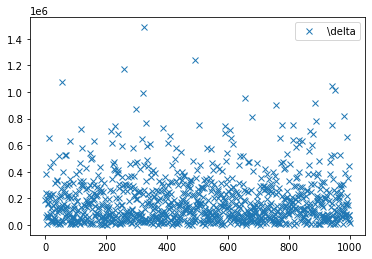

In [52]:
ddd=np.zeros(hidden_size1)
with torch.no_grad():
    for i in range(hidden_size1):
        dd= model.fc1.weight[i,0]*model.fc1.weight[i,0]+model.fc1.bias[i]*model.fc1.bias[i]-model.fc2.weight[0,i]*model.fc2.weight[0,i]
        ddd[i]=dd
plt.plot(ddd,'x',label=r'\delta')
#plt.ylim([1, 11])
plt.savefig('del.pdf')
plt.legend()

plt.show()

In [53]:
def fline(model, Nmin, Nmax, num=1000):
    x=np.zeros(num)
    y=np.zeros(num)
    d=1.*(Nmax-Nmin)/num
    with torch.no_grad():
        for i in range(num):
            x[i]=Nmin+i*d
            xx=torch.tensor(Nmin+i*d).reshape(-1, 1).to(device).float()
            y[i]=model(xx).numpy()
            
    return x,y
        

In [54]:

 
blank = ' '
print('-----------------------------------------------')
print('|   weight name   |        weight shape       |')
print('-----------------------------------------------')

for index, (key, w_variable) in enumerate(model.named_parameters()):
    if len(key)<=15: key = key + (15-len(key))*blank
    w_variable_blank = ''
    if len(w_variable.shape) == 1:
        if w_variable.shape[0] >= 100: w_variable_blank = 8*blank
        else: w_variable_blank = 9*blank
    elif len(w_variable.shape) == 2:
        if w_variable.shape[0] >= 100: w_variable_blank = 2*blank
        else: w_variable_blank = 3*blank
 
    print('| {} | {}{} |'.format(key, w_variable.shape, w_variable_blank))
    key = 0
print('-----------------------------------------------')


-----------------------------------------------
|   weight name   |        weight shape       |
-----------------------------------------------
| fc1.weight      | torch.Size([1000, 1])   |
| fc1.bias        | torch.Size([1000])         |
| fc2.weight      | torch.Size([1, 1000])    |
-----------------------------------------------


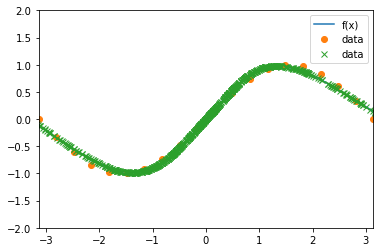

In [55]:

b=model.state_dict()['fc1.weight'].numpy().reshape(-1)
c=model.state_dict()['fc1.bias'].numpy().reshape(-1)
d=-c/b


y_d= np.zeros(len(d))
with torch.no_grad():
    for i in range(len(d)):
        xx=torch.tensor(d[i]).reshape(-1, 1).to(device).float()
        y_d[i]=model(xx).numpy()


x,y=fline(model,Nmin, Nmax)

plt.plot(x,y,label='f(x)')
plt.plot(train_data,train_label,'o',label='data')
plt.plot(d,y_d,'x',label='data')

plt.xlim([Nmin, Nmax])
plt.ylim([-2, 2])
plt.legend()
plt.savefig('1delta-100.pdf')

plt.show()

In [ ]:
|